## 03.01 Splitting data into languages

In the laster chaper "First Exploration" we realized that duplicated tweets have not been collected for a timespan beginnin 2022 until the beginnin of 2023. To guarante consistency in the analysis, we will deduplicate all the data. 

The csvs files will be split into single language files. This allows for better deduplication which only needs to look at one langauge at a time. Also for translation and languages specific exploration later on, this split is necessary. A separate csv file for 'en', 'de','fr','it','es','uk','ru' will be created. English is skipped here because its file is too big for one file.

In [ ]:
import importlib
import src.spliting_languages_03
importlib.reload(src.spliting_languages_03)
from src.spliting_languages_03 import split_csvs_into_language, splits_csvs_only_english, language_csvs_quick_stats
import numpy as np


path_data = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
path_to_languages = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"

selected_languages = np.array(['es','uk','ru'])

split_csvs_into_language(selected_languages, path_data, path_to_languages)
splits_csvs_only_english(path_data, path_to_languages)

language_csvs_quick_stats(path_to_languages)




  0%|          | 0/476 [00:00<?, ?it/s]

100%|██████████| 476/476 [1:14:36<00:00,  9.40s/it]   


es (3113760, 35)


100%|██████████| 476/476 [15:14<00:00,  1.92s/it]


uk (1541110, 35)


100%|██████████| 476/476 [2:37:23<00:00, 19.84s/it]    


ru (964087, 35)


100%|██████████| 476/476 [6:07:17<00:00, 46.30s/it]      


uk: 972.2352085 mb
es: 2053.303945 mb
it: 2086.324622 mb
de: 2565.441376 mb
fr: 2474.38873 mb
ru: 701.8336678 mb
en_1: 5313.855784 mb
en_0: 6291.764665 mb


Aggregate the dataframes to get a short overview if everything worked out.

In [2]:
from src.utility import aggregate_data
from src.spliting_languages_03 import aggregate_languages
import pandas as pd
path_to_lang_agg = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/lang_agg.csv"
path_to_languages = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"

#df_la_agg = aggregate_data(path_to_languages,path_to_lang_agg, aggregate_languages)
df_la_agg = pd.read_csv(path_to_lang_agg)




Language counts are the same as in Chapter 02. Except for english where already all tweets marked as retweets or tweets that are duplicated on a single file are filtered out. For duplicate count we get higher values because here duplicates are determined over the whole timespan instead for every single day. Also note that english has been split over two files.

In [3]:
df_la_agg['diff'] = df_la_agg['count'] - df_la_agg['dupl_count']
df_la_agg[['la','count','dupl_count','diff']]

,la,count,dupl_count,diff
0,uk,1541110,565597,975513
1,es,3113760,1969303,1144457
2,it,3262053,1990490,1271563
3,de,3872212,2176729,1695483
4,fr,3795086,2596867,1198219
5,ru,964087,423548,540539
6,en,7559951,293104,7266847
7,en,8914144,449301,8464843


Load only ID, TEXT and Timestamp to make them even smaller and save them to a new directory. Files are really small now, even english can be loaded into ram now as it is ~3.5 gb

In [4]:
import pandas as pd
import os
from src.data_schemas import OrigDataSchema
from src.spliting_languages_03 import language_csvs_quick_stats

path_to_target = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/"
path_to_lang = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Languages/"
# for path in [x for x in os.listdir(path_to_lang) if x.endswith(".csv")]:

#     df = pd.read_csv(path_to_lang + path, usecols=[OrigDataSchema.ID,OrigDataSchema.TEXT,OrigDataSchema.IS_RETWEET,OrigDataSchema.TIMESTAMP]).dropna(subset='text')
#     df['dupl'] = df.duplicated(subset=OrigDataSchema.TEXT) if  OrigDataSchema.IS_RETWEET not in df.columns else df.duplicated(subset=OrigDataSchema.TEXT) | df[OrigDataSchema.IS_RETWEET]
#     df = df[~df['dupl']][[OrigDataSchema.ID,OrigDataSchema.TEXT,OrigDataSchema.TIMESTAMP]]
    
#     df.to_csv(path_to_target + path)

language_csvs_quick_stats(path_to_target)

uk: 227.3149014 mb
es: 282.3185148 mb
it: 305.7117825 mb
de: 432.1801624 mb
en: 3747.915836 mb
fr: 283.8881044 mb
ru: 148.3543968 mb


For english as it was split along two csvs: Merge and deduplicate:

In [ ]:
df_en_1 = pd.read_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/en_0.csv')
df_en_2 = pd.read_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/en_1.csv')

df_en = pd.concat([df_en_1,df_en_2])
print(df_en.shape)
df_en = df_en[~df_en.duplicated(subset=OrigDataSchema.TEXT)]
print(df_en.shape)
df_en.to_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/en.csv')

/var/folders/p4/mx8kx4hn5cg_f40s3984wrs80000gn/T/ipykernel_3423/3683372935.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_en_2 = pd.read_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/en_1.csv')


(15076340, 4)
(14905024, 4)


Last check the rows of the dataframes again to make sure nothing went wrong:

In [5]:
from src.utility import aggregate_data_path
path_to_lang_min = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/"
path_to_aggregated_min = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/lang_agg_min.csv"

# df_agg_min = aggregate_data_path( 
#     dir_path=path_to_lang_min,
#     target_path= path_to_aggregated_min,
#     aggregate_function=lambda df, path: {'shape':df.shape, 'la': path.split('/')[-1].split('.')[0]} 
#     )

df_agg_min = pd.read_csv(path_to_aggregated_min)

df_agg_min




,Unnamed: 0,shape,la
0,0,"(950927, 4)",uk
1,1,"(1140305, 4)",es
2,2,"(1271595, 4)",it
3,3,"(1695586, 4)",de
4,4,"(14905024, 5)",en
5,5,"(1135044, 4)",fr
6,6,"(532599, 4)",ru
7,7,"(7105998, 4)",en_1
8,8,"(7970342, 4)",en_0


# 03.02 Noisy Deduplication with Min Hash

Paper [Deduplicating Training Data Makes Language Models Better](https://github.com/Freshpinguin/TopicAnalysisRUWTweets/blob/main/Papers/Deduplication/deduplicationimprovesmaodel.pdf) shows that NLP in general profits from deduplicated text and documents. 
Paper [Noise-Robust De-Duplication at Scale](https://github.com/Freshpinguin/TopicAnalysisRUWTweets/blob/main/Papers/Deduplication/comparision.pdf) compares different approaches for noisy deduplication. They come to the conclusion that a new encoder, neural based approach gives the best results. Also they show LSH (local sensitive hashing) gives good results. As it is way easier and less time consuming to implement, i will stick to LSH here.

Jaccard Similarity is a metric on sets. It is defined as the power of the intersection divided by the power of the union of two sets. To use this metric on texts, the texts have to be transformed into a set first. This is done by cutting the text into shingles as shown in the example below. 

In [6]:

def shingle(text:str, shingle_len: int=3) -> set[str]:
    """
    Makes shingles out of text.
    """
    return set(text[head:head + shingle_len] for head in range(0, len(text) - shingle_len))

shingle("Beispiel")



{'Bei', 'eis', 'isp', 'pie', 'spi'}

Here is an example of the jaccard similiarity betweet two texts. In this example you can already see, the two parameters that are needed for this kind of deduplication: Shingle Length and Similiarity Threeshold.

In [7]:
def jaccard_sim(set_a: set, set_b: set) -> float:
    """
    Calc jaccard sim between two sets.
    """
    intersection = set_a & set_b
    union = set_a | set_b
    return len(intersection) / len(union)


print(f"Sim between 'Beispiel' and 'Eisspiegel' Shingle Length 2: {jaccard_sim(shingle('Beispiel',2), shingle('Eisspiegel',2))} Shingle Length 4: {jaccard_sim(shingle('Beispiel',4), shingle('Eisspiegel',4))}")
print(f"Sim between 'Beispiel' and 'Beieispl' Shingle Length 2: {jaccard_sim(shingle('Beispiel',2), shingle('Beieispl',2))} Shingle Length 4: {jaccard_sim(shingle('Beispiel',4), shingle('Beieispl',4))}")


Sim between 'Beispiel' and 'Eisspiegel' Shingle Length 2: 0.4 Shingle Length 4: 0.1111111111111111
Sim between 'Beispiel' and 'Beieispl' Shingle Length 2: 0.8333333333333334 Shingle Length 4: 0.14285714285714285


To find reasonable values for those two parameters i did some experimenting on a sample of 1000 tweets of the german texts. To calculate jaccard similarity is very computional heavy as it has to calculate for every tweet on every other tweet, giving it a O(n*n) timecomplexity.

In [8]:
import pandas as pd 
from src.data_schemas import OrigDataSchema
df_de_min = pd.read_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/de.csv')
df_de_min = df_de_min.drop_duplicates(subset=OrigDataSchema.ID)
df_de_min = df_de_min[[OrigDataSchema.TEXT,OrigDataSchema.TIMESTAMP, OrigDataSchema.ID]]
df_de_min.shape

(1695405, 3)

In [10]:
from src.noisy_deduplication_04 import jaccard_duplicates, duplicates_ex

df_sample = df_de_min.sample(1000, random_state=1)

df_sample['dupl_jacc'] = jaccard_duplicates(df_sample, shingle_length=6, threshold=0.7)

duplicates_ex(df_sample, row_name="dupl_jacc")

100%|██████████| 1000/1000 [00:25<00:00, 38.86it/s]

Duplicates found: 1, fraction of all: 0.001 

@KuehniKev Schwere Waffen sind die Art von Auslandshilfe, die die Ukraine derzeit am dringendsten benötigt.
#ArmUkraineNow #GermanyWakeUp
@Karl_Lauterbach Schwere Waffen sind die Art von Auslandshilfe, die die Ukraine derzeit am dringendsten benötigt.
#ArmUkraineNow #GermanyWakeUp


Minhash using LSH is a probabilistic approximation of jiccard sim that is way faster to calculate and will be used from here on.

In [ ]:
from src.noisy_deduplication_04 import efficient_minhash_lsh, duplicates_ex

df_sample = df_de_min.sample(1000,random_state=1)

df_sample['dupl'] = efficient_minhash_lsh(df_sample, shingle_length=6,threshold=0.7)

duplicates_ex(df_sample,row_name='dupl')



  0%|          | 0/1000 [00:00<?, ?it/s]

Duplicates found: 1, fraction of all: 0.001 

@KuehniKev Schwere Waffen sind die Art von Auslandshilfe, die die Ukraine derzeit am dringendsten benötigt.
#ArmUkraineNow #GermanyWakeUp
@Karl_Lauterbach Schwere Waffen sind die Art von Auslandshilfe, die die Ukraine derzeit am dringendsten benötigt.
#ArmUkraineNow #GermanyWakeUp


In [ ]:
df_sample = df_de_min.sample(10000, random_state=1)

df_sample['dupl'] = efficient_minhash_lsh(df_sample, shingle_length=6,threshold=0.7)

duplicates_ex(df_sample,row_name='dupl')

  0%|          | 0/10000 [00:00<?, ?it/s]

Duplicates found: 47, fraction of all: 0.0047 

@KuehniKev Schwere Waffen sind die Art von Auslandshilfe, die die Ukraine derzeit am dringendsten benötigt.
#ArmUkraineNow #GermanyWakeUp
@Karl_Lauterbach Schwere Waffen sind die Art von Auslandshilfe, die die Ukraine derzeit am dringendsten benötigt.
#ArmUkraineNow #GermanyWakeUp
@BMI_Bund Russischer Kraftstoff ist voller Verunreinigungen. Voller Blut der ukrainischen Kinder, voller Tränen der ukrainischen Mütter, voller Staub der zerstörten Städte. Seid ihr bereit, damit weiterzuleben? #BuchaMassacre #RussianWar #RussianWarCrimes #GenocideInUkraine https://t.co/DDuj0AVe1I
@c_lindner Russischer Kraftstoff ist voller Verunreinigungen. Voller Blut der ukrainischen Kinder, voller Tränen der ukrainischen Mütter, voller Staub der zerstörten Städte. Seid ihr bereit, damit weiterzuleben? #BuchaMassacre #RussianWar #RussianWarCrimes #GenocideInUkraine https://t.co/5hoLDaAvG3
#Wirtschaftskrise #Inflation #GrünerMist  
#Ampel fährt Deutschland  an

For me a shingle length of 6 and a threshold of 0.7 seem to be fitting values to find duplicates. Shorter shingles make random intersections more likely and a lower threshold also finds alot of pairs that are too different to keep them as duplicates.

In [ ]:
from src.noisy_deduplication_04 import load_dedupl_save_pipeline

load_dedupl_save_pipeline(
    source_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/uk.csv",
    target_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/uk.csv")


  0%|          | 0/950920 [00:00<?, ?it/s]

/Users/robinfeldmann/TopicAnalysisRUWTweets/src/noisy_deduplication_04.py:151: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([meta_df, pd.DataFrame([row])]).to_csv(path_to_meta_data)


Duplicates found: 50986, fraction of all: 0.05361754932065789 



In [ ]:
from src.noisy_deduplication_04 import load_dedupl_save_pipeline

load_dedupl_save_pipeline(
    source_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/ru.csv",
    target_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/ru.csv")


  0%|          | 0/532593 [00:00<?, ?it/s]

Duplicates found: 71413, fraction of all: 0.13408550243807185 



In [ ]:
from src.noisy_deduplication_04 import load_dedupl_save_pipeline

load_dedupl_save_pipeline(
    source_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/it.csv",
    target_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/it.csv")



  0%|          | 0/1271494 [00:00<?, ?it/s]

Duplicates found: 93217, fraction of all: 0.07331296883823282 



In [ ]:
from src.noisy_deduplication_04 import load_dedupl_save_pipeline

load_dedupl_save_pipeline(
    source_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/fr.csv",
    target_path="/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/fr.csv")
    
    


  0%|          | 0/1135000 [00:00<?, ?it/s]

Duplicates found: 85401, fraction of all: 0.0752431718061674 



# 03.03 Overview of deduplication process

In [14]:
import pandas as pd
from src.data_schemas import OrigDataSchema
from src.utility import iterate_dataframes_path
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
df_agg = pd.DataFrame()
df_agg_old = pd.read_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/agg.csv')
df_agg_old = df_agg_old.sort_values('date')
df_agg['date'] = df_agg_old['date']
selected_languages = np.array(['en','de','fr','it','es','uk','ru'])
df_agg = df_agg.set_index('date')

Taking the old aggregated data csv from the first exploration part.

In [15]:

for df, path in iterate_dataframes_path("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min_dedupl/"):
    lang = f"noisy_dedupl_{path.split('/')[-1].split('.')[0]}"

    
    df['date'] = df[OrigDataSchema.TIMESTAMP].astype(str).apply(lambda x: x[:10])
    df_agg[lang] = df.groupby('date').count()['text']


100%|██████████| 7/7 [01:12<00:00, 10.38s/it]


Adding a row for noisy deduplicated for each language.

In [16]:
for df, path in iterate_dataframes_path("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Language_min/"):
    lang = f"dedupl_{path.split('/')[-1].split('.')[0]}"

    
    df['date'] = df[OrigDataSchema.TIMESTAMP].astype(str).apply(lambda x: x[:10])
    df_agg[lang] = df.groupby('date').count()['text']
    

100%|██████████| 7/7 [01:16<00:00, 10.88s/it]


Adding a row for normal deduplicated for each language.

In [17]:
from src.data_schemas import MetaDataSchema
df_agg.reset_index(inplace=True)
df_agg['week'] = df_agg.reset_index()[MetaDataSchema.DATE].apply(pd.to_datetime).apply(lambda x: str(x.year)+ "-" + str(x.week) if len(str(x.week))==2 else str(x.year)+ "-0" + str(x.week))
df_agg.set_index('date', inplace=True)

df_agg_old.reset_index(inplace=True)
df_agg_old['week'] = df_agg_old.reset_index()[MetaDataSchema.DATE].apply(pd.to_datetime).apply(lambda x: str(x.year)+ "-" + str(x.week) if len(str(x.week))==2 else str(x.year)+ "-0" + str(x.week))
df_agg_old.set_index('date', inplace=True)

df_agg[selected_languages] = df_agg_old[selected_languages]

df_agg['rows'] = df_agg[selected_languages].sum(axis=1)
df_agg_old['rows'] = df_agg_old[selected_languages].sum(axis=1)

df_agg['rows_dedupl'] = df_agg[[f"dedupl_{x}" for x in selected_languages ]].sum(axis=1)
df_agg['rows_dedupl_noisy'] = df_agg[[f"noisy_dedupl_{x}" for x in selected_languages ]].sum(axis=1)

df_agg_old['rows_dedupl'] = df_agg_old[[f"{x}_dupl" for x in selected_languages ]].sum(axis=1)

Some other aggregation and preparation of the dataframe.

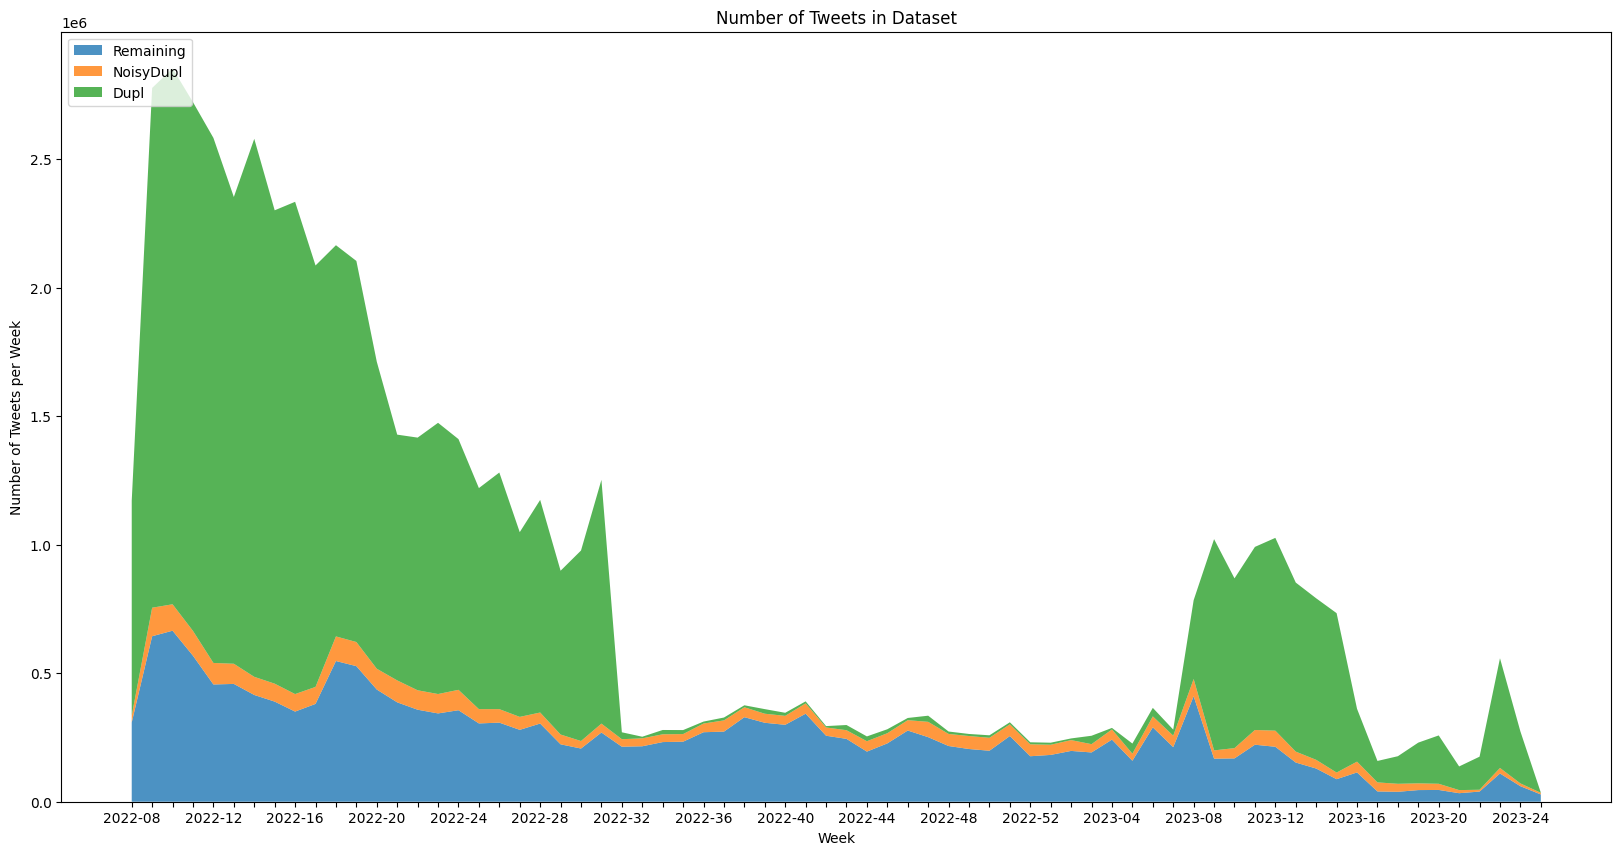

In [368]:
import warnings
import matplotlib.pyplot as plt
df = df_agg.copy()


df_weeks = df.groupby("week")[['rows','rows_dedupl','rows_dedupl_noisy']].sum()#'rows_dedupl','rows_noisy_dedupl']].sum()




df_weeks['noisy_dupl'] = df_weeks['rows_dedupl'] - df_weeks['rows_dedupl_noisy']

df_weeks['duplicates'] = df_weeks['rows'] - df_weeks['rows_dedupl']

fig, ax = plt.subplots()
index=["" for _ in range(len(df_weeks.index))] 
index[::4]=list(df_weeks.index)[::4]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    ax.set_xticklabels(index)

ax.stackplot(df_weeks.index, [df_weeks['rows_dedupl_noisy'], df_weeks['noisy_dupl'], df_weeks['duplicates']],#df_weeks_old['rows']],#[df_weeks[la] for la in ['rows_dedupl','rows_noisy_dedupl']],
                labels=['Remaining', 'NoisyDupl','Dupl'], alpha=0.8)


ax.legend(loc='upper left')
ax.set_title('Number of Tweets in Dataset')
ax.set_xlabel('Week')

ax.set_ylabel('Number of Tweets per Week')

plt.show()


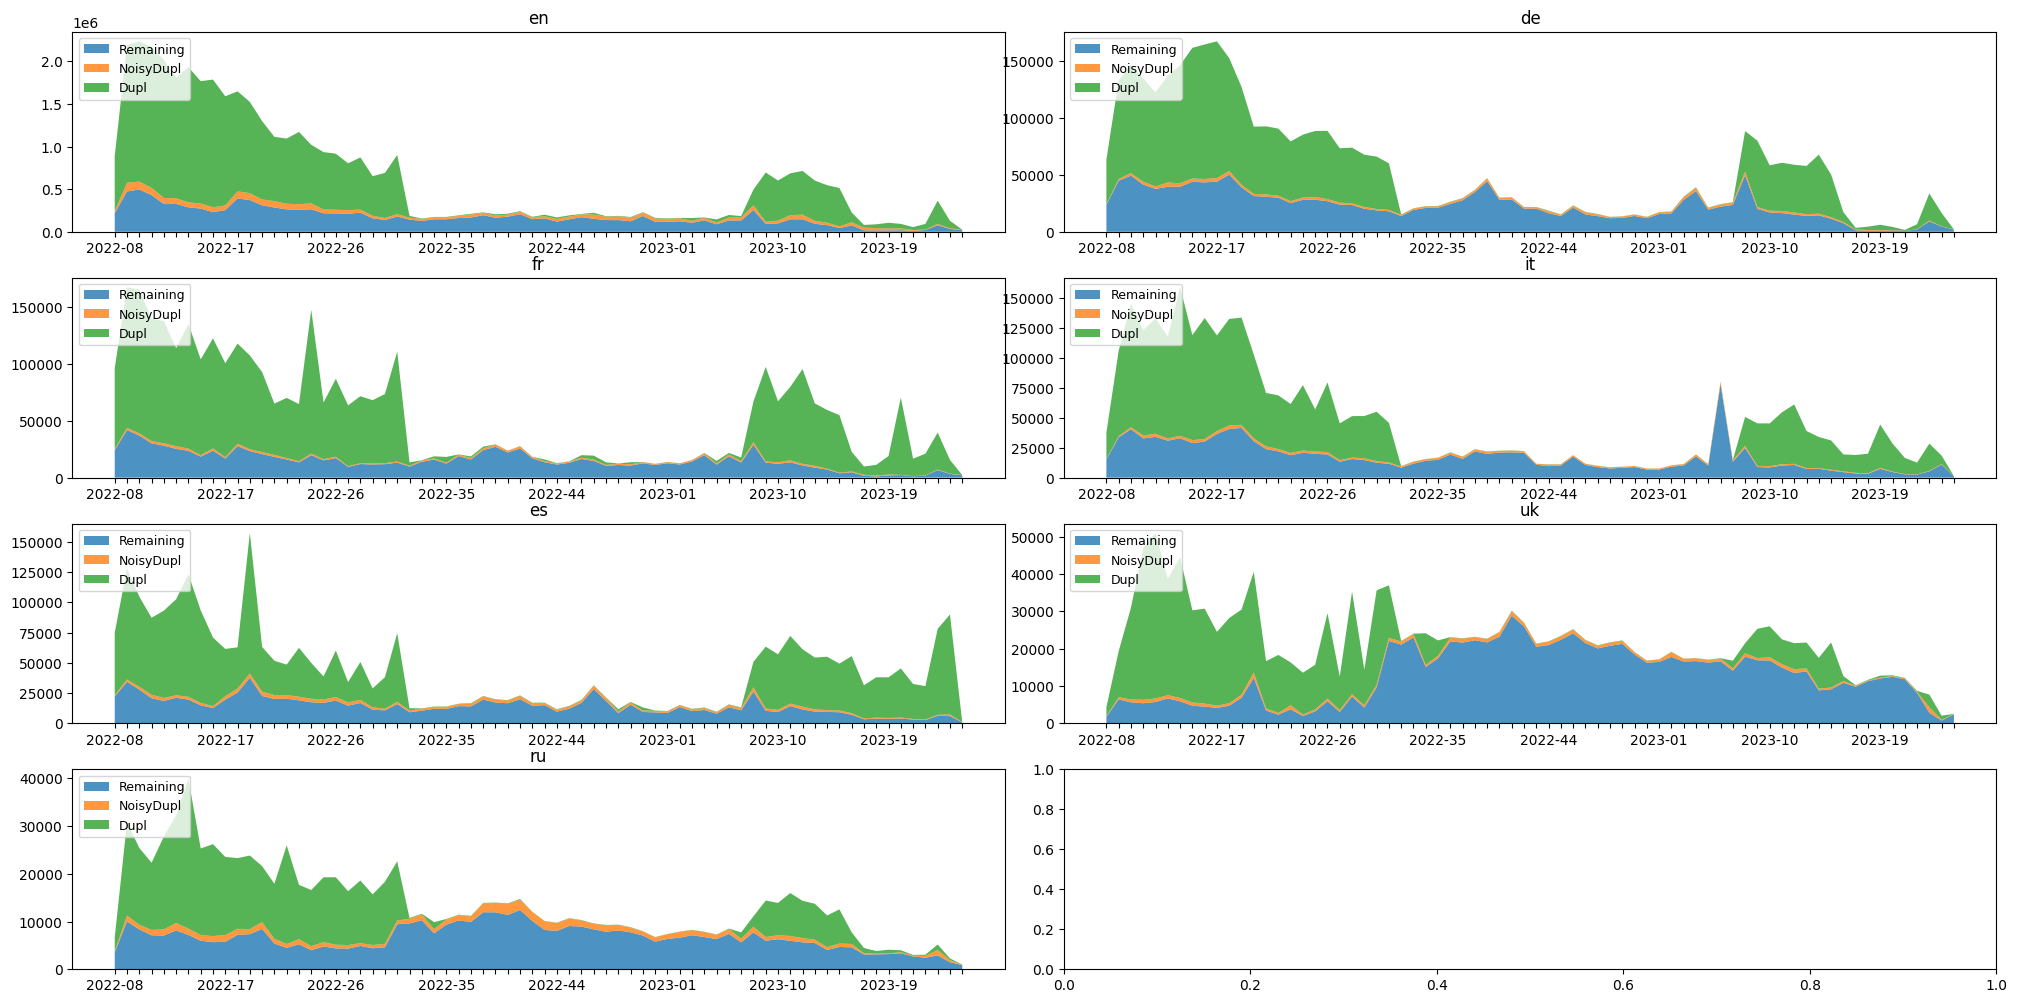

In [373]:
stackplot_duplicates_over_weeks_multipl(df_agg, selected_languages)

In [26]:
def stackplot_duplicates_over_weeks_multipl(df: pd.DataFrame, languages: np.ndarray[str], save_path: str = None ) -> None:
    """
    Gives multiple stackplot, one for every language provided. Paints duplicates and not duplicates in different colors.
    """




    fig, ax = plt.subplots( (languages.shape[0] + 1) // 2 ,2)
    fig.tight_layout(pad=1.2)
    for lang_index, language in enumerate(languages):
        x_ind = lang_index // 2
        y_ind = lang_index % 2
        #df['weeks'] = df[MetaDataSchema.DATE].apply(pd.to_datetime).apply(lambda x: str(x.year)+ "-" + str(x.week) if len(str(x.week))==2 else str(x.year)+ "-0" + str(x.week))
        
        df_weeks = df.groupby("week")[[language,"dedupl_"+language,"noisy_dedupl_"+language]].sum()#'rows_dedupl','rows_noisy_dedupl']].sum()

        
        

        df_weeks[lang+'noisy_dupl'] = df_weeks["dedupl_"+language] - df_weeks["noisy_dedupl_"+language]

        df_weeks[lang+'duplicates'] = df_weeks[language] - df_weeks["dedupl_"+language]
        
        
        
        ax[x_ind,y_ind].stackplot(df_weeks.index, [df_weeks["noisy_dedupl_"+language], df_weeks[lang+'noisy_dupl'], df_weeks[lang+'duplicates']],#df_weeks_old['rows']],#[df_weeks[la] for la in ['rows_dedupl','rows_noisy_dedupl']],
                labels=['Remaining', 'NoisyDupl','Dupl'], alpha=0.8)

        index=["" for _ in range(len(df_weeks.index))] 
        index[::9]=list(df_weeks.index)[::9]
    
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            ax[x_ind,y_ind].set_xticklabels(index)#
        ax[x_ind,y_ind].legend(loc='upper left',fontsize="9")
        ax[x_ind,y_ind].set_title(f'{language}')
    if save_path:
        plt.savefig(save_path)
    plt.show()



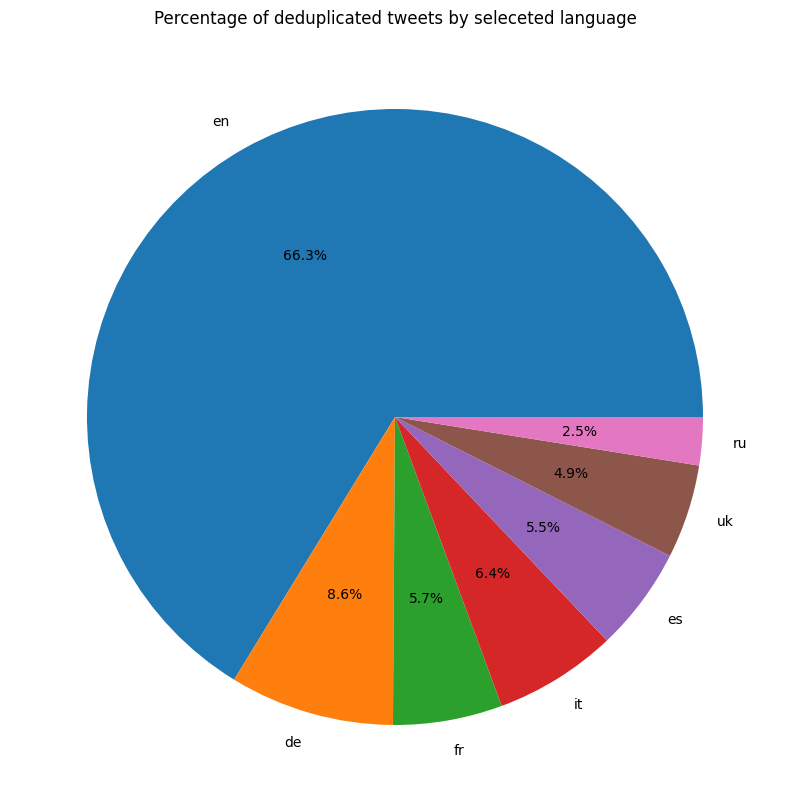

In [68]:
pi_lang_freq(df_agg, selected_languages)

In [67]:
def pi_lang_freq(df: pd.DataFrame, languages: np.ndarray[str], save_path: str=None, not_dupl: bool=False) -> None:
    """
    Sums up the languages in languages in df and shows freqencies in a pie chart.
    """
    for la in languages:
        if not 'noisy_dedupl_'+la in df.columns:
            raise KeyError(f"Language: {'noisy_dedupl_'+la} not in df columns.")



  
    language_counts = [df['noisy_dedupl_'+la].sum() for la in languages]

    
    

    language_freq = np.array([la_co/sum(language_counts) for la_co in language_counts])
    freqs = language_freq 
    fig, ax = plt.subplots()
    ax.pie(freqs, labels=languages, autopct='%1.1f%%')

    if save_path:
        plt.savefig(save_path)
        
    ax.set_title(f'Percentage of deduplicated tweets by seleceted language')
    plt.show()

In [38]:
df_agg.columns

Index(['noisy_dedupl_uk', 'noisy_dedupl_es', 'noisy_dedupl_it',
       'noisy_dedupl_de', 'noisy_dedupl_en', 'noisy_dedupl_fr',
       'noisy_dedupl_ru', 'dedupl_uk', 'dedupl_es', 'dedupl_it', 'dedupl_de',
       'dedupl_en', 'dedupl_fr', 'dedupl_ru', 'week', 'en', 'de', 'fr', 'it',
       'es', 'uk', 'ru', 'rows', 'rows_dedupl', 'rows_dedupl_noisy'],
      dtype='object')

In [65]:
import matplotlib.patches as mpatches

def languages_bar_h(df_agg: pd.DataFrame, languages_to_show:np.ndarray[str]) -> None:
    """
    Shows count of tweets, percentage of duplicates in a barh graph.
    """
    
    #languages_to_show = np.append(languages_to_show,'others')

    df = df_agg
    language_counts = np.array([df["noisy_dedupl_"+la].sum() for la in languages_to_show])
    
    sorting = np.argsort(language_counts)
    language_counts = language_counts[sorting]
    languages_to_show = languages_to_show[sorting]


    
    language_freqs = np.array([la_count/language_counts.sum() for la_count in language_counts])
    
    fig, ax = plt.subplots()
    
    labels = languages_to_show
    ax.barh(labels, language_counts,label=labels[0], left=0)
    #ax.barh(labels, language_dupl, label=labels[1], left=language_counts)

    for i, la in enumerate(languages_to_show):
        #ax.text((language_counts )[i], i,f"{language_freqs[i]:10.2%}", ha='center', va='center')
        ax.text((language_counts)[i] - 50000 if i==0 else language_counts[i], i,f"{(int(language_counts[i]))} {language_freqs[i]:10.2%}", ha='center', va='center')
        


    ax.set_title('Number of Deduplicated Tweets per Language')
    
    plt.show()

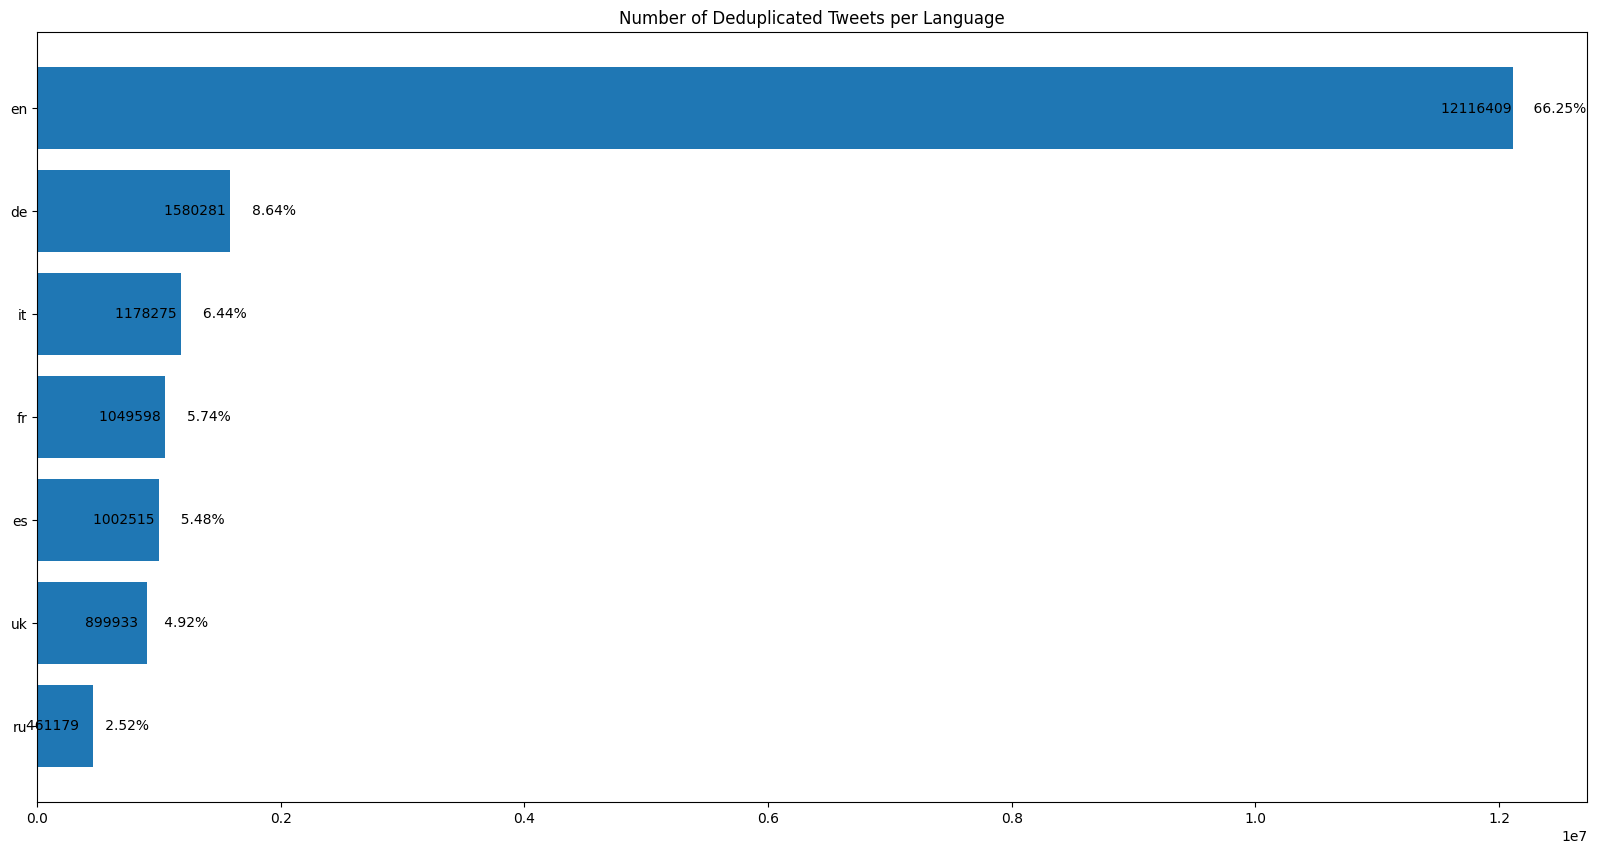

In [66]:
languages_bar_h(df_agg, selected_languages)